In [1]:
%config Completer.use_jedi=False

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
import seaborn as sns

sns.set_style("whitegrid")

## Evaluating a machine learning model

Three ways to evaluate a Scikit-Learn model/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 Evaluating a model with the `score` method

In [6]:
!dir ..\data

 Volume in drive D has no label.
 Volume Serial Number is A0BD-6A7B

 Directory of D:\Users\Matt\GitHub\zero-to-mastery-ml\data

01/31/2021  03:31 PM    <DIR>          .
01/31/2021  03:31 PM    <DIR>          ..
01/31/2021  03:31 PM        72,077,822 bluebook-for-bulldozers.zip
01/31/2021  03:31 PM            31,922 car-sales-extended-missing-data.csv
01/31/2021  03:31 PM            27,278 car-sales-extended.csv
01/31/2021  03:31 PM               287 car-sales-missing-data.csv
01/31/2021  03:31 PM               369 car-sales.csv
01/31/2021  03:31 PM        28,088,920 dog-vision-full-model-predictions-with-mobilenetV2.csv
01/31/2021  03:31 PM        31,081,357 dog-vision-prediction-probabilites-array.csv
01/31/2021  03:31 PM               392 exported-car-sales.csv
01/31/2021  03:31 PM            12,688 exported-patient-data.csv
01/31/2021  03:31 PM            11,328 heart-disease.csv
              10 File(s)    131,332,363 bytes
               2 Dir(s)  223,451,746,304 bytes free


In [4]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier()

np.random.seed(42)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
rfc.score(X_test, y_test)

0.8360655737704918

### 4.2 Evaluating a model using the `scoring` parameter

In [8]:
from sklearn.model_selection import cross_val_score

In [15]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()

np.random.seed(42)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
cross_val_score(rfc, X, y)

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ])

In [17]:
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y))
rfc_single_score = rfc.score(X_test, y_test)

rfc_single_score, rfc_cross_val_score

(0.8360655737704918, 0.8281420765027322)

In [19]:
cross_val_score(rfc, X, y, scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.85      , 0.75      ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve (AUC)
3. Confusion matrix
4. Classification report


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [10]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)  #accuracy: default metric/score


In [11]:
np.mean(cross_val_score)

0.8248087431693989

In [12]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) versus a model's false positive rate (FPR)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [16]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [34]:
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
        0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ]),
 array([0.        , 0.05555556, 0.16666667, 0.41666667, 0.47222222,
        0.47222222, 0.61111111, 0.72222222, 0.75      , 0.75      ,
        0.88888889, 0.94444444, 0.97222222, 0.97222222, 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([2.  , 1.  , 0.97, 0.8 , 0.78, 0.76, 0.71, 0.68, 0.67, 0.66, 0.5 ,
        0.43, 0.42, 0.12, 0.09, 0.06, 0.03, 0.01, 0.  ]))

## Create function for plotting ROC curves

In [1]:
import matplotlib.pyplot as plt 

In [2]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


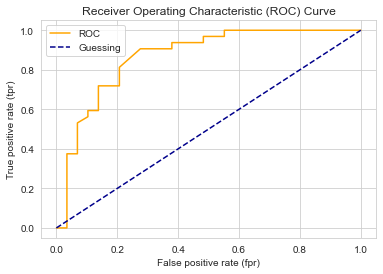

In [19]:
plot_roc_curve(fpr, tpr)

In [21]:
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

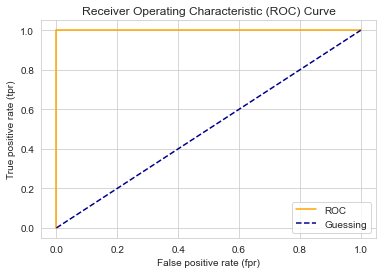

In [22]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [23]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [25]:
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [26]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


In [31]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

In [32]:
conf_mat = confusion_matrix(y_test, y_preds)

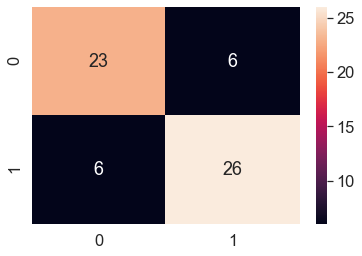

In [36]:
sns.heatmap(conf_mat, annot=True);